Final deliverable - Informatievisualisatie – Julia Bakker (14599740), John-Anthony (14673207), Marijn Versluis (13263668) & Joah Goedhart (14307170) – Bachelor Informatiekunde – Jaar 1 - Groep G2

# Beyond Borders: The Interplay of Mental Health and Socio-Economic Factors Worldwide

## 1 Introduction

In this analysis, we will be highlighting the happiness levels and mental health disorders around the world. We will use two datasets to explore the relationship between happiness and mental health from different angles. The first dataset consists of the happiness scores of each country from 2005 to 2022, consisting of various metrics such as GDP, social support, healthy life expectancy and more. The dataset allows us to do an extensive analysis of multiple factors that could influence the happiness of people, considering the potential impact of economic and health related factors.

The second dataset focuses on the global rating regarding the prevalence of mental health disorders, for each country from 1960 to 2017. It provides insight into the prevalence of disorders such as schizophrenia, bipolar disorder, eating disorders, anxiety disorders, depression, and substance use disorders. This dataset allows us to do an extensive analysis of multiple factors that could influence the happiness and healthy life expectancy of people.

### 1.1 The analysis of the following perspectives:

1. *Wealth and mental health are closely related:* This perspective focuses on how socio-economic the factors GDP per capita and happiness can influence mental health disorders. Whether countries with higher socio-economic scores tend to have lower rates of mental health disorders and vice versa will be explored. It is surmised that there is a correlation. 

There is no *No significcorrelation between ion wealth and mental health:* From this perspective, we aim to investigate the correlation between GDP per capita, happiness and the prevalence of mental health disorders. The idea is to see if higher happiness scores correlate with lower mental health issues and if this connection holds true across different regions and cultures. It is assumed that there is no significant correlation: some will point towards a relation; others will refute there is one.

### 1.2 Argumentation perspectives

*<u>Perspective 1: Socio-economic factors and mental health</u>*

*Argument 1:* Generally speaking, countries with higher GDP tend to have lower rates of mental health disorders. This argument aims to explore the association between economic prosperity and mental well-being. The visualization of this association can include a scatter plot where GDP is plotted on the x-axis, the prevalence of depression on the y-axis, and each data point represents a country.

*Argument 2:* Western countries are more developed and therefore happier; people outside those countries are more depressed. This argument highlights the potential role of development in the state of mental well-being. The visualization of this role can show a world map with gradients that show the severity of — for example — depression to display the most depressing regions in the world.

*<u>Perspective 2: Correlation between happiness and mental health</u>*

* Argument 1:*Countries with higher happiness scores tend to have lower rates of mental health disorders like depression and anxiety. This argument explores the relationship between subjective well-being and mental health. The visualization of this relationship could include a 3d plot of the variables that shows whether they cluster or not.

*Argument 2:* Family plays a crucial role in the correlation between happiness and mental health. This argument highlights the impact of Family on mental well-being. The visualization of this correlation could show a scatter plot comparing happiness scores, prevalence rates of mental health disorders, and levels of Family meaning across countries. 

By examining the relationship between happiness, socio-economic factors, and mental health disorders, we aim to shed light on the complex dynamics that influence individuals' well-being.  


## 2 Dataset and preprocessing

<u>*World Happiness Report, 2005–Present*</u>

The World Happiness Report dataset is used in this analysis to provide information of each country from 2005 until 2022. The dataset includes various metrics such as GDP, social support, healthy life expectancy, and more. The dataset can be downloaded from https://www.kaggle.com/datasets/usamabuttar/world-happiness-report-2005-present.

1. For the processing of the dataset multiple steps were taken:
2. The dataset was obtained in CSV format and loaded into Jupyter Notebook for analysis.
3. The original dataset is copied to apply modifications and remove unnecessary columns without changing the original dataset. 
4. From the copied dataset the year 2017 is selected and the missing values are removed. 
5. The dataset is merged with the Global Trends in Mental Health Disorder on the column “Country Name”.
6. The merged dataset is used to create multiple visualizations that supports the established perspectives 

*<u>Global Trends in Mental Health Disorder</u>*

The Global Trends in Mental Health Disorder dataset is used in this analysis to provide information of each country from 1960 until 2017. The dataset provides global data on the prevalence of various mental health disorders, including schizophrenia, bipolar disorder, eating disorders, anxiety disorders, depression, and substance use disorders. The dataset can be downloaded from https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder.

For the processing of the dataset several steps were taken:
1. The dataset was obtained in CSV format and loaded into Jupyter Notebook for analysis.
2. The original dataset is copied to apply modifications and remove unnecessary columns without changing the original dataset. 
3. From the copied dataset the year 2017 is selected and the missing values are removed.
4. The column “Entity” is renamed to “Country Name” to merge the dataset with the World Happiness dataset. 
5. The merged dataset is used to create multiple visualizations that supports the established perspectives


In [2]:
# reads the necessary modules/libraries
import geopandas as gpd
import pandas as pd
import plotly.express as px
import random
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [3]:
# reads the required datasets and displays them
world_happiness = pd.read_csv('World Happiness Report.csv')
world_mental = pd.read_csv('Mental health Depression disorder Data.csv')

display(world_happiness.head(), world_mental.head())

/var/folders/26/857cdtq51v5b981sk9klpqzm0000gn/T/ipykernel_7179/892285340.py:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  world_mental = pd.read_csv('Mental health Depression disorder Data.csv')


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
# prepares the two datasets for their merging
# by selecting their common year, 2017, and changing a column name
world_happiness_2017 = world_happiness.loc[world_happiness['Year'] == 2017].copy().dropna()
world_mental_2017 = world_mental.loc[world_mental['Year'] == '2017'].copy().drop('index', axis=1).dropna()
world_mental_2017.rename(columns={"Entity": "Country Name"}, inplace=True)

In [5]:
# merges the DataFrames, and displays them consequently
df = pd.merge(world_happiness_2017, world_mental_2017, on="Country Name", how='inner')
display(df.head())

# seeks a possible Pearson's correlation
print("The correlation between GDP per capita and Life Ladder is:", 
      df['Log GDP Per Capita'].corr(df['Life Ladder']) )

,Country Name,Regional Indicator,Year_x,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,...,Confidence In National Government,Code,Year_y,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,...,0.261179,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Albania,Central and Eastern Europe,2017,4.639548,9.455110,0.637698,69.050003,0.749611,-0.030506,0.876135,...,0.457738,ALB,2017,0.201025,0.70448,0.174046,3.385245,0.517614,2.208414,1.837955
2,Argentina,Latin America and Caribbean,2017,6.039330,10.068880,0.906699,67.000000,0.831966,-0.189601,0.841052,...,0.305430,ARG,2017,0.198094,0.773376,0.404033,6.283678,1.008901,3.665488,1.824515
3,Armenia,Commonwealth of Independent States,2017,4.287736,9.434255,0.697925,66.550003,0.613697,-0.152285,0.864683,...,0.246901,ARM,2017,0.197365,0.717591,0.167047,2.592813,0.504360,2.754583,1.964988
4,Australia,North America and ANZ,2017,7.257038,10.787260,0.949958,70.750000,0.910550,0.313771,0.411347,...,0.453407,AUS,2017,0.363326,1.142097,0.943081,6.584301,2.315142,4.623881,1.511935


The correlation between GDP per capita and Life Ladder is: 0.777235576833162


In [6]:
# prepares the data for the creation of bar charts

numeric_columns = df.select_dtypes(include='number')

df_mean = df.groupby(['Regional Indicator'])[numeric_columns.columns].mean()
df_mean = df_mean.reset_index()

df_sum = df.groupby(['Regional Indicator'])[numeric_columns.columns].sum()
df_sum = df_sum.reset_index()

In [7]:
# displays the disorders as floats
data_columns= [
            'Bipolar disorder (%)','Schizophrenia (%)','Eating disorders (%)',
            'Anxiety disorders (%)','Drug use disorders (%)','Depression (%)',
            'Alcohol use disorders (%)'
]

df[data_columns]= df[data_columns].astype(float)
display(df.head())

,Country Name,Regional Indicator,Year_x,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,...,Confidence In National Government,Code,Year_y,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,...,0.261179,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Albania,Central and Eastern Europe,2017,4.639548,9.455110,0.637698,69.050003,0.749611,-0.030506,0.876135,...,0.457738,ALB,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
2,Argentina,Latin America and Caribbean,2017,6.039330,10.068880,0.906699,67.000000,0.831966,-0.189601,0.841052,...,0.305430,ARG,2017,0.198094,0.773376,0.404033,6.283678,1.008901,3.665488,1.824515
3,Armenia,Commonwealth of Independent States,2017,4.287736,9.434255,0.697925,66.550003,0.613697,-0.152285,0.864683,...,0.246901,ARM,2017,0.197365,0.717591,0.167047,2.592813,0.504360,2.754583,1.964988
4,Australia,North America and ANZ,2017,7.257038,10.787260,0.949958,70.750000,0.910550,0.313771,0.411347,...,0.453407,AUS,2017,0.363326,1.142097,0.943081,6.584301,2.315142,4.623881,1.511935


## 3 Visualizations
In this segment, visualisation of the aforementioned arguments will be shown. A short conclusion will be provided as well.

### 3.1 Perspective 1: Wealth and mental health are closely related
*<u>Argument 1: countries with higher GDP tend to have lower rates of mental health disorders</u>*

According to this figure, there is no correlation between the GDP and mental health state of a country.

*<u>Argument 2: Western countries are more developed and therefore happier; people outside those countries are more depressed</u>*

According to world map, the opposite seems to be true: less wealthy countries/regions have lower depression rates.

In [23]:
# Create a layout object that contains the specifications for the X and Y axes.
layout = go.Layout(
    title = "Anxiety disorders (%), Happiness and GDP per region",
    xaxis=go.layout.XAxis(
        type='category'
    ),
    xaxis_title="Regional Indicator",
    yaxis_title="Strength",
)

    
trace1 = go.Bar (
    x = df_mean["Regional Indicator"],
    y = df_mean["Anxiety disorders (%)"],
    name = "Anxiety disorders (%)",
    marker = dict(
        color = 'rgb(252, 115, 3)'
    )
)

trace2 = go.Bar (
    x = df_mean["Regional Indicator"],
    y = df_mean["Life Ladder"],
    name = "Happiness",
    marker = dict(
        color = 'rgb(14, 174, 237)'
    )
)

trace3 = go.Bar (
    x = df_mean["Regional Indicator"],
    y = df_mean["Log GDP Per Capita"],
    name = "GDP",
    marker = dict(
        color = 'rgb(135, 18, 219)'
    )
)

# Create a list of the traces.
data = [trace1, trace2, trace3]

# Create a figure object with the data and layout objects.
fig = go.Figure(data=data, layout=layout)

# Show the figure.
fig.show()


In [21]:
scatter2d = px.scatter(
                        df, 
                        x= 'Life Ladder', 
                        y= 'Eating disorders (%)', 
                        color= 'Country Name',
                        trendline='ols',
                        trendline_scope='overall',
                        title='Relationship between Eating disorders and Life ladder',
                        height= 300
)

scatter2d.update_layout(xaxis_title='Life Ladder')

scatter2d.show()



scatter2d = px.scatter(
                        df, 
                        x= 'Log GDP Per Capita', 
                        y= 'Eating disorders (%)', 
                        color= 'Country Name',
                        trendline='ols',
                        trendline_scope='overall',
                        title='Relationship between Eating disorders and GDP per Capita',
                        height= 300
)

scatter2d.update_layout(xaxis_title='GDP per Capita')

scatter2d.show()

In [16]:
scatter = px.scatter_3d(
                       df,
                       x= 'Life Ladder',
                       y='Log GDP Per Capita',
                       z='Schizophrenia (%)',
                       color='Country Name',
                       opacity= 0.7,
)

scatter.update_layout(
    title='Relationship between Schizophrenia, GDP and life ladder per country'
)

scatter.show()






scatter = px.scatter_3d(
                       df,
                       x= 'Life Ladder',
                       y='Social Support',
                       z='Eating disorders (%)',
                       color='Country Name',
                       opacity= 0.7,
)

scatter.update_layout(
    title='Relationship between Eating disorders, Social Support and life ladder per country'
)

scatter.show()

### 3.2 Perspective 2: There is no significant correlation between wealth and mental health.
*<u>Argument 1: Countries with higher happiness scores tend to have lower rates of mental health disorders like depression and anxiety</u>*

According to this figure, **NOG DOEN**

In [18]:
#displays the world's depression as a gradiant world map
fig = px.choropleth(
                    df,
                    locations='Code',
                    color='Depression (%)',
                    hover_name='Country Name',
                    color_continuous_scale='Viridis_r',
                    labels={'Depression (%)': 'Depression'},
                    )

fig.update_layout(
    title='World mental health condition in terms of depression',
    height=600
)

fig.show()

In [20]:
# # displays the relations between three mental health measurements as a 3d plot

# scatter = go.Figure(px.scatter_3d(
#                        df,
#                        x= 'Life Ladder',
#                        y='Log GDP Per Capita',
#                        z='Anxiety disorders (%)',
#                        color='Country Name',
#                        opacity= 0.7,
                       
#     )
# )

# scatter.update_layout(
#     title='Relationship Anxiety, GDP and depression per country',
# )

# go_scatter= go.Figure(scatter)

# go_scatter.show()

In [10]:
# displays relationship between depression and GDP per capita in countries as a 2d plot
scatter2d = px.scatter(
                        df, 
                        x= 'Log GDP Per Capita', 
                        y= 'Depression (%)', 
                        color= 'Country Name',
                        trendline='ols',
                        trendline_scope='overall',
                        title='Relationship between depression and GDP per capita of countries',
                        height= 300
)

scatter2d.update_layout(xaxis_title='GDP per capita')

scatter2d.show()

*<u>Argument 2: Generosity plays a crucial role in the correlation between happiness and mental health</u>*

According to this figure, **NOG DOEN**

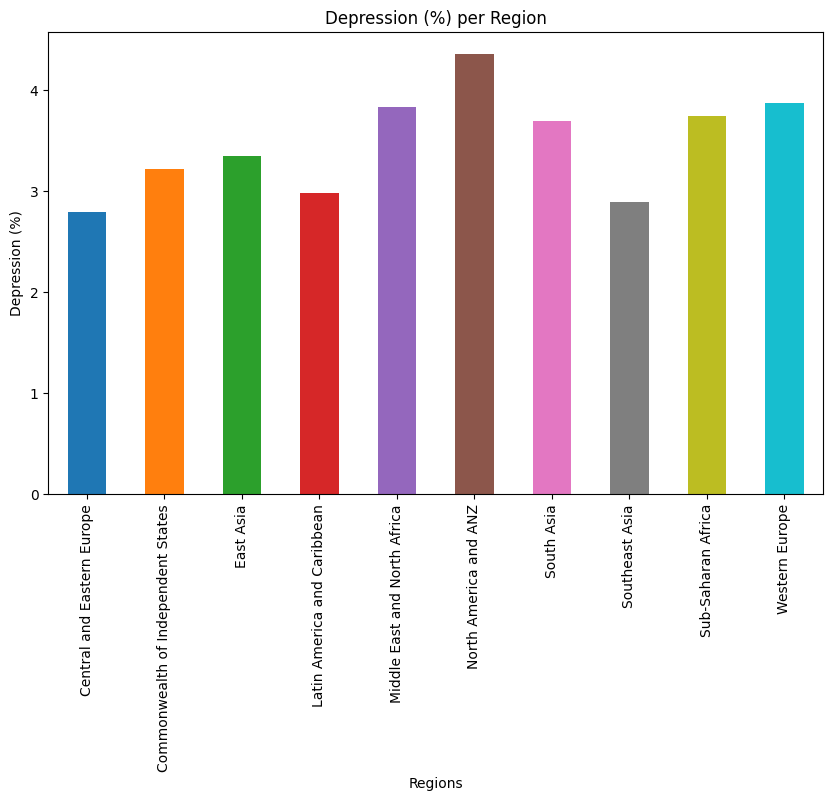

In [13]:
# displays a couple depression-related bar charts
chart= px.bar(df.head() ,x='Country Name',y='Bipolar disorder (%)')

chart.update_layout(
    barmode='group',
    xaxis= {
        'type':'category'
    }
)

chart.show()


df_depression = df.groupby("Regional Indicator")["Depression (%)"].mean()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

df_depression.plot(kind='bar', title='Depression (%) per Region',
               ylabel='Depression (%)', xlabel='Regions', figsize=(10, 6), color=colors)


bar= px.bar(df_mean, x='Regional Indicator', y='Depression (%)', color='Regional Indicator')

bar.update_layout(
    title='Depression (%) per Region'
)

bar.show()